In [6]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

# These commands below set some options for pandas and to have matplotlib show the charts in the notebook
pd.set_option('display.max_rows', 1000)
pd.options.display.float_format = '{:,.2f}'.format
%matplotlib inline

# Load the data
# We have this defaulted to the folder OUTSIDE of your repo - please change it as needed
#contrib = pd.read_csv(r"C:\Users\tgeod\Downloads\UC Berkeley\200- Python for Data Science\Complete Data-Seattle\Data to use", index_col=False)
file_path = r'C:\Users\tgeod\Downloads\UC Berkeley\200- Python for Data Science\Complete Data-Seattle\Data to use\Investor_home_purchases_by_metro_2000-2023.xlsx'
df_investor_purchase= pd.read_excel(file_path)

file_path_seattle_abnb_2023 = r'C:\Users\tgeod\Downloads\UC Berkeley\200- Python for Data Science\Complete Data-Seattle\Seattle_Airbnb_Data\airbnb_listings_Seattle_2023_Sept.csv'
df_seattle_abnb_2023= pd.read_csv(file_path_seattle_abnb_2023)

file_path_seattle_abnb_2016 = r'C:\Users\tgeod\Downloads\UC Berkeley\200- Python for Data Science\Complete Data-Seattle\Seattle_Airbnb_Data\listings.csv'
df_seattle_abnb_2016= pd.read_csv(file_path_seattle_abnb_2016)

file_path_ofm_2010_2020 = r'C:\Users\tgeod\Downloads\UC Berkeley\200- Python for Data Science\Complete Data-Seattle\Data to use\ofm_april1_intercensal_estimates_2010_2020.xlsx'
df_ofm_2010_2020= pd.read_excel(file_path_ofm_2010_2020)

file_path_ofm_housing_unit_2020_2023 = r'C:\Users\tgeod\Downloads\UC Berkeley\200- Python for Data Science\Complete Data-Seattle\Data to use\ofm_april1_housing_unit-Seattle_2020-2023.xlsx'
df_housing_unit_2020_2023= pd.read_excel(file_path_ofm_housing_unit_2020_2023)

file_path_ofm_population_2020_2023=r'C:\Users\tgeod\Downloads\UC Berkeley\200- Python for Data Science\Complete Data-Seattle\Data to use\ofm_april1_population_final_2020-2023.xlsx'

df_population_2020_2023= pd.read_excel(file_path_ofm_population_2020_2023)

file_path_seattle_rental = r'C:\Users\tgeod\Downloads\UC Berkeley\200- Python for Data Science\Complete Data-Seattle\Data to use\Rental_Property_Registration.csv'

df_seattle_rental= pd.read_csv(file_path_seattle_rental)

sale_data = pd.read_csv(r'C:\Users\tgeod\Downloads\UC Berkeley\200- Python for Data Science\Complete Data-Seattle\Data to use\sales.csv', encoding='latin-1')


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\tgeod\\Downloads\\UC Berkeley\\200- Python for Data Science\\Complete Data-Seattle\\Data to use\\Investor_home_purchases_by_metro_2000-2023.xlsx'

In [ ]:
df_investor_purchase.head(10)

import pandas as pd

# Assuming your DataFrame is named df
df_investor_purchase['Quarter'].fillna(method='ffill', inplace=True)

# Display the updated DataFrame
df_investor_purchase


C:\Users\tgeod\AppData\Local\Temp\ipykernel_20604\2975356357.py:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_investor_purchase['Quarter'].fillna(method='ffill', inplace=True)


,Quarter,Redfin Metro,Investor Market Share,Investor Purchases,Investor Purchases YoY
0,2023 Q3,National,0.16,48667,-0.30
1,2023 Q3,"Anaheim, CA",0.22,1158,-0.12
2,2023 Q3,"Atlanta, GA",0.19,3671,-0.50
3,2023 Q3,"Baltimore, MD",0.16,1234,-0.24
4,2023 Q3,"Charlotte, NC",0.18,1375,-0.50
...,...,...,...,...,...
3791,2000 Q1,"Seattle, WA",0.03,265,NaN
3792,2000 Q1,"Tampa, FL",0.09,1008,NaN
3793,2000 Q1,"Warren, MI",0.09,1096,NaN
3794,2000 Q1,"Washington, DC",0.05,535,NaN


In [ ]:
# Filtering data for Seattle
seattle_investor_purchase_data = df_investor_purchase[df_investor_purchase['Redfin Metro'] == 'Seattle, WA']
seattle_investor_purchase_data.head()


,Quarter,Redfin Metro,Investor Market Share,Investor Purchases,Investor Purchases YoY
34,2023 Q3,"Seattle, WA",0.09,514,-0.32
74,2023 Q2,"Seattle, WA",0.11,661,-0.22
114,2023 Q1,"Seattle, WA",0.13,528,-0.16
154,2022 Q4,"Seattle, WA",0.10,481,-0.42
194,2022 Q3,"Seattle, WA",0.10,752,-0.24


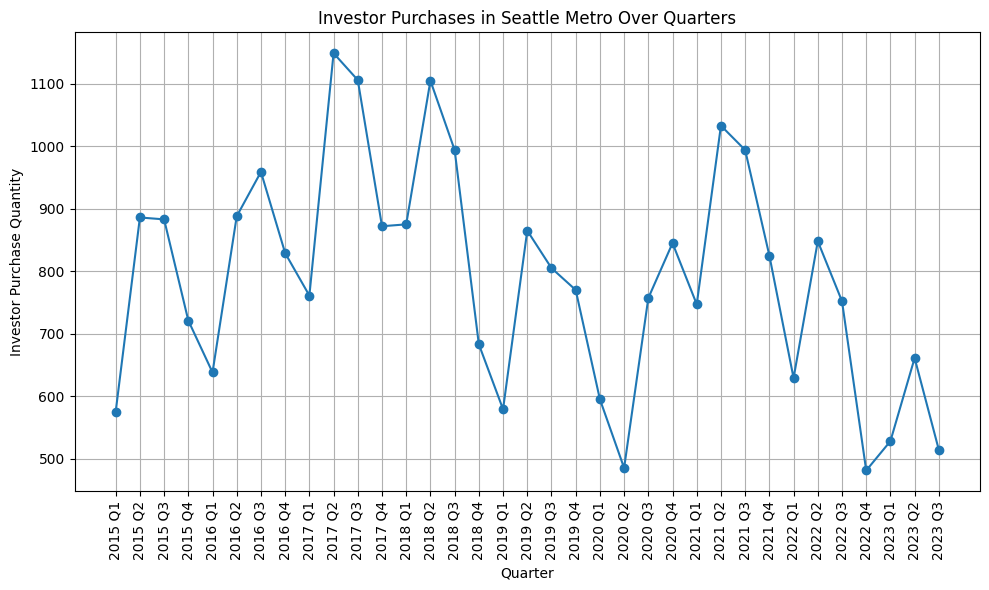

In [ ]:

start_quarter = '2015 Q1'
end_quarter = '2023 Q3'
seattle_investor_purchase_data = seattle_investor_purchase_data[(seattle_investor_purchase_data['Quarter'] >= start_quarter) & (seattle_investor_purchase_data ['Quarter'] <= end_quarter)]
seattle_investor_purchase_data = seattle_investor_purchase_data[::-1]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(seattle_investor_purchase_data['Quarter'], seattle_investor_purchase_data['Investor Purchases'], marker='o', linestyle='-')
plt.title('Investor Purchases in Seattle Metro Over Quarters')
plt.xlabel('Quarter')
plt.ylabel('Investor Purchase Quantity')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

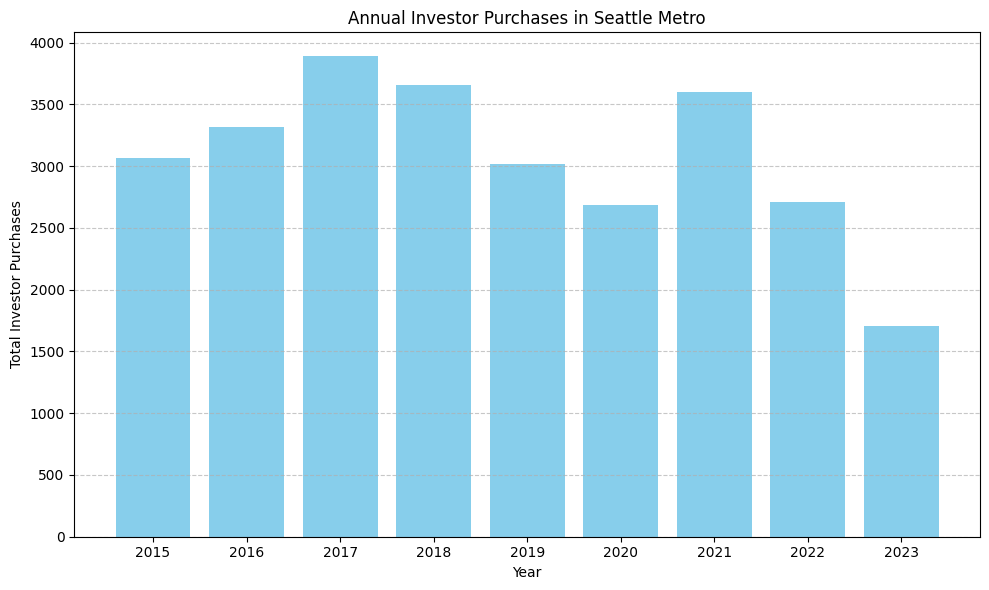

In [ ]:

#'Quarter' is a string with format 'YYYY QX'
seattle_investor_purchase_data['Year'] = seattle_investor_purchase_data['Quarter'].str.extract('(\d{4})')[0]
seattle_investor_purchase_data['Year'] = seattle_investor_purchase_data['Year'].astype(int)

# Grouping by year and summing the 'Investor Purchases'
yearly_data = seattle_investor_purchase_data.groupby('Year')['Investor Purchases'].sum().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(yearly_data['Year'], yearly_data['Investor Purchases'], color='skyblue')
plt.title('Annual Investor Purchases in Seattle Metro')
plt.xlabel('Year')
plt.ylabel('Total Investor Purchases')
plt.xticks(yearly_data['Year'])  # Set explicit x-axis ticks
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


C:\Users\tgeod\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\contextily\tile.py:614: UserWarning: The inferred zoom level of 29 is not valid for the current tile provider (valid zooms: 0 - 19).
  warnings.warn(msg)


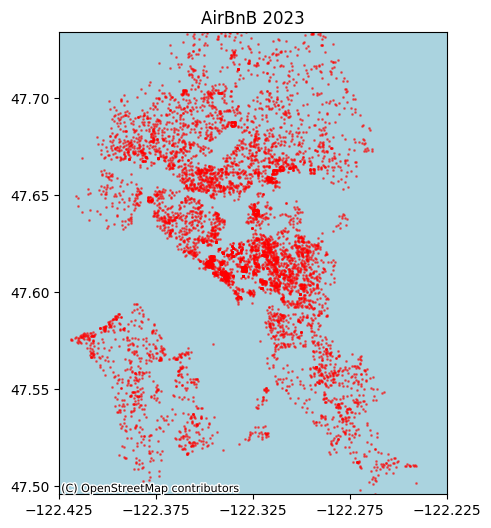

In [ ]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import contextily as ctx

df_seattle_abnb_2023.head()

# Creating a GeoDataFrame from latitude and longitude columns
geometry = [Point(lon, lat) for lon, lat in zip(df_seattle_abnb_2023['longitude'], df_seattle_abnb_2023['latitude'])]
gdf = gpd.GeoDataFrame(df_seattle_abnb_2023, geometry=geometry)

# Getting bounding box of the GeoDataFrame
bbox = gdf.total_bounds

# Creating a base map using contextily
ax = gdf.plot(figsize=(10, 6), color='red', markersize=1, alpha=0.5)
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# Setting the x and y-axis limits based on the bounding box
ax.set_xlim([bbox[0], bbox[2]])
ax.set_ylim([bbox[1], bbox[3]])

# Customizing x-axis ticks
ax.set_xticks(ax.get_xticks()[::2])  # Adjusted the interval as needed

# Displaying map
plt.title(f'AirBnB 2023')
plt.show()



In [ ]:
df_seattle_abnb_2016.head(2)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.00,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.00,f,NaN,WASHINGTON,f,strict,t,t,6,1.48


C:\Users\tgeod\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\contextily\tile.py:614: UserWarning: The inferred zoom level of 29 is not valid for the current tile provider (valid zooms: 0 - 19).
  warnings.warn(msg)


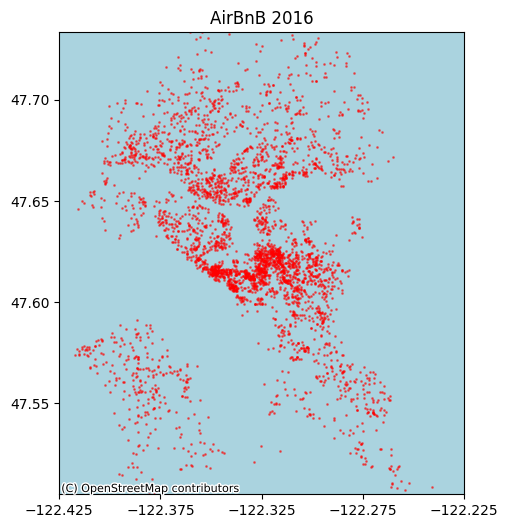

In [ ]:

# Creating a GeoDataFrame from latitude and longitude columns
geometry = [Point(lon, lat) for lon, lat in zip(df_seattle_abnb_2016['longitude'], df_seattle_abnb_2016['latitude'])]
gdf = gpd.GeoDataFrame(df_seattle_abnb_2016, geometry=geometry)

# Getting bounding box of the GeoDataFrame
bbox = gdf.total_bounds

# Creating a base map using contextily
ax = gdf.plot(figsize=(10, 6), color='red', markersize=1, alpha=0.5)
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# Setting the x and y-axis limits based on the bounding box
ax.set_xlim([bbox[0], bbox[2]])
ax.set_ylim([bbox[1], bbox[3]])

# Customizing x-axis ticks
ax.set_xticks(ax.get_xticks()[::2])  # Adjust the interval as needed

# Displaying the map
plt.title(f'AirBnB 2016')
plt.show()


In [ ]:
#df_seattle_abnb_2023.describe()

df_seattle_abnb_2023['calculated_host_listings_count'].count()



6823

In [ ]:
#df_seattle_abnb_2016.describe()
df_seattle_abnb_2016['calculated_host_listings_count'].count()

3818

In [ ]:
(6823-3818)/3818

0.787061288632792

In [ ]:
# sheet_name_ofm_2010_2020 = 'Total Population'

# # Load the Excel file
# df_ofm_2010_2020_population = pd.read_excel(file_path_ofm_2010_2020, sheet_name = 'Total Population')

# df_ofm_2010_2020_population.head()

# # Filter data for CityName with King County
# king_county_population_2010_2020_data = df_ofm_2010_2020_population[df_ofm_2010_2020_population['City Name'] == 'King County'].iloc[0]

# # Select the relevant columns for plotting
# years_2010_2019= ['2010 Total Population Base', '2011 Intercensal Total Population Estimate',
#                    '2012 Intercensal Total Population Estimate', '2013 Intercensal Total Population Estimate',
#                    '2014 Intercensal Total Population Estimate', '2015 Intercensal Total Population Estimate',
#                    '2016 Intercensal Total Population Estimate', '2017 Intercensal Total Population Estimate',
#                    '2018 Intercensal Total Population Estimate', '2019 Intercensal Total Population Estimate',]


# #Plot a bar chart for King County household population over the years
# plt.figure(figsize=(12, 6))
# plt.bar(years, king_county_population_2010_2020_data[years_2010_2019])

# plt.title('Household Population in King County Over the Years')
# plt.xlabel('Year')
# plt.ylabel('Household Population (in millions)')
# plt.xticks(range(len(years_2010_2019)), [year.split()[0] for year in years_2010_2019], rotation=45, ha='right')
# plt.grid(True)
# plt.show()



In [ ]:
"""Seattle Population Data from 2010 to 2020"""

sheet_name_ofm_2010_2020 = 'Total Population'
# Loading the Excel file
df_ofm_2010_2020_population = pd.read_excel(file_path_ofm_2010_2020, sheet_name = 'Total Population')
#Filter data for Jurisdiction with Seattle city
seattle_population_2010_2020_data = df_ofm_2010_2020_population[df_ofm_2010_2020_population['Jurisdiction'] == 'Seattle city'].iloc[0]
seattle_population_2010_2020_data

Line                                                   175
Filter                                                4.00
County Name                                           King
City Name                                          Seattle
Jurisdiction                                  Seattle city
City FIPS Code                                   63,000.00
2010 Total Population Base                      608,660.00
2011 Intercensal Total Population Estimate      611,249.00
2012 Intercensal Total Population Estimate      614,283.00
2013 Intercensal Total Population Estimate      624,045.00
2014 Intercensal Total Population Estimate      638,784.00
2015 Intercensal Total Population Estimate      660,908.00
2016 Intercensal Total Population Estimate      684,136.00
2017 Intercensal Total Population Estimate      694,513.00
2018 Intercensal Total Population Estimate      707,555.00
2019 Intercensal Total Population Estimate      724,144.00
2020 Total Population Base                      737,015.

In [ ]:
"""Seattle Population data from 2020 to 2023"""
sheet_name_ofm_population_2020_2023 = 'Population'

#Loading the Excel file
df_ofm_population_2020_2023= pd.read_excel(file_path_ofm_population_2020_2023, sheet_name = 'Population')
df_ofm_population_2020_2023.head()


,Line,Filter,County,Jurisdiction,2020 Population Census,2021 Population Estimate¹,2022 Population Estimate,2023 Population Estimate
0,1,1,Adams,Adams County,20613,20900,21100,21200
1,2,2,Adams,Unincorporated Adams County,9472,9575,9575,9585
2,3,3,Adams,Incorporated Adams County,11141,11325,11525,11615
3,4,4,Adams,Hatton,79,80,80,80
4,5,4,Adams,Lind,535,535,535,535


In [ ]:

#Filtering data for Jurisdiction wit Seattle
seattle_population_2020_2023_data = df_ofm_population_2020_2023[df_ofm_population_2020_2023['Jurisdiction'] == 'Seattle']

#columns to keep for data from 2020 to 2023
selected_columns = ['2020 Population Census', '2021 Population Estimate¹', '2022 Population Estimate', '2023 Population Estimate','Jurisdiction']

# Extracting the selected columns
selected_population_data = seattle_population_2020_2023_data[selected_columns]

selected_population_data

,2020 Population Census,2021 Population Estimate¹,2022 Population Estimate,2023 Population Estimate,Jurisdiction
174,737015,742400,762500,779200,Seattle


In [ ]:
# Manually updating Jurisdiction value in selected_population_data
selected_population_data['Jurisdiction'] = 'Seattle city'

# Merging the DataFrames
combined_population_data = pd.merge(
    seattle_population_2010_2020_data.to_frame().T,
    selected_population_data,
    on='Jurisdiction',
    how='left'
)

# Dropping the duplicate 'Jurisdiction' column from the second DataFrame
combined_population_data = combined_population_data.loc[:, ~combined_population_data.columns.duplicated()]

# Print the combined data
combined_population_data




C:\Users\tgeod\AppData\Local\Temp\ipykernel_20604\2829327687.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_population_data['Jurisdiction'] = 'Seattle city'


,Line,Filter,County Name,City Name,Jurisdiction,City FIPS Code,2010 Total Population Base,2011 Intercensal Total Population Estimate,2012 Intercensal Total Population Estimate,2013 Intercensal Total Population Estimate,...,2015 Intercensal Total Population Estimate,2016 Intercensal Total Population Estimate,2017 Intercensal Total Population Estimate,2018 Intercensal Total Population Estimate,2019 Intercensal Total Population Estimate,2020 Total Population Base,2020 Population Census,2021 Population Estimate¹,2022 Population Estimate,2023 Population Estimate
0,175,4.00,King,Seattle,Seattle city,"63,000.00","608,660.00","611,249.00","614,283.00","624,045.00",...,"660,908.00","684,136.00","694,513.00","707,555.00","724,144.00","737,015.00",737015,742400,762500,779200


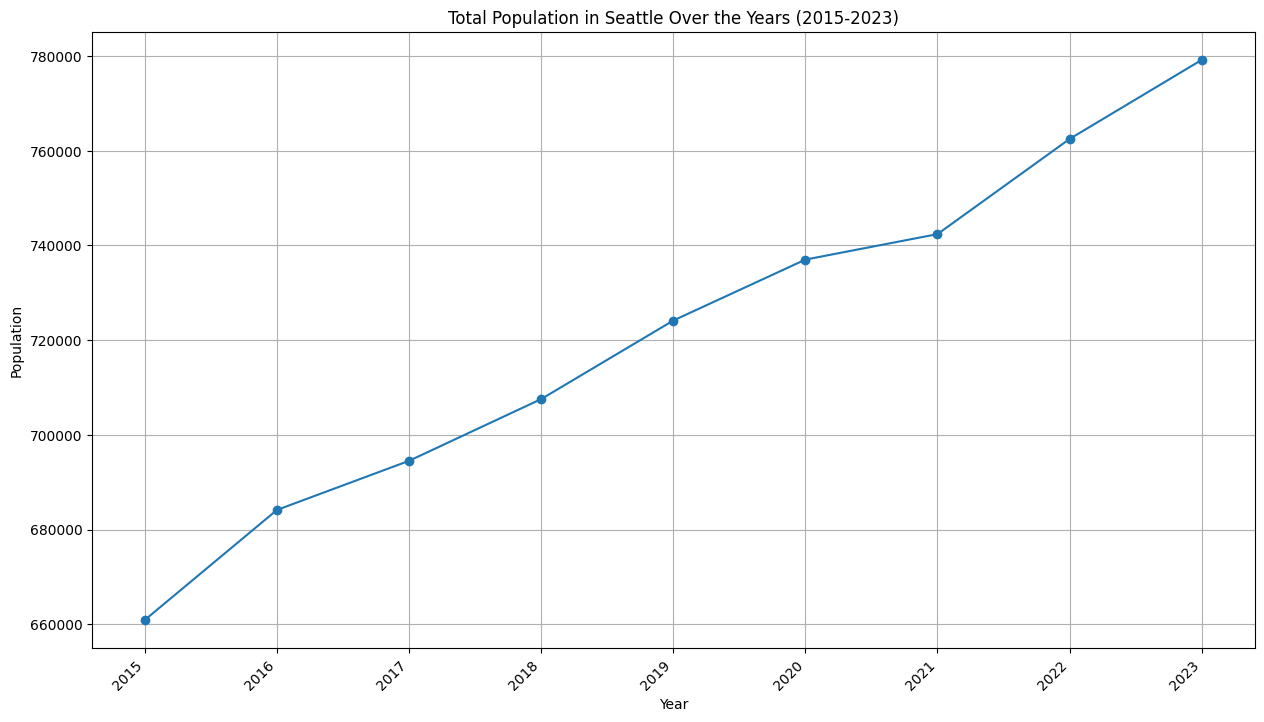

In [ ]:
# Extracting the columns for plotting. Plotting from 2015 to 2023.
years_columns = [ '2015 Intercensal Total Population Estimate',
                 '2016 Intercensal Total Population Estimate', '2017 Intercensal Total Population Estimate',
                 '2018 Intercensal Total Population Estimate', '2019 Intercensal Total Population Estimate',
                 '2020 Population Census', '2021 Population Estimate¹',
                 '2022 Population Estimate', '2023 Population Estimate']

# Plotting a line chart for the combined data
plt.figure(figsize=(15, 8))
plt.plot(years_columns, combined_population_data[years_columns].iloc[0], marker='o')

plt.title('Total Population in Seattle Over the Years (2015-2023)')
plt.xlabel('Year')
plt.ylabel('Population')
plt.xticks(range(len(years_columns)), [year.split()[0] for year in years_columns], rotation=45, ha='right')

plt.grid(True)

plt.show()


In [ ]:
#Population change from 2015 to 2023
combined_population_data['2023 Population Estimate'] - combined_population_data['2015 Intercensal Total Population Estimate']

0   118,292.00
dtype: object

In [ ]:
#Similar approach to combine housing unit data from two separate excel files. 
#file_path_ofm_housing_unit_2020_2023 = r'C:\Users\tgeod\Downloads\UC Berkeley\200- Python for Data Science\Complete Data-Seattle\Data to use\ofm_april1_housing_unit-Seattle_2020-2023.xlsx'
#df_housing_unit_2020_2023= pd.read_excel(file_path_ofm_housing_unit_2020_2023)
"""Seattle Housing Unit Data from 2010 to 2020"""

sheet_name_ofm_2010_2020 = 'Total Housing'
# Loading the Excel file
df_ofm_2010_2020_housing = pd.read_excel(file_path_ofm_2010_2020, sheet_name = 'Total Housing')
df_ofm_2010_2020_housing.head()


,Line,Filter,County Name,City Name,Jurisdiction,City FIPS Code,2010 \nTotal Housing Unit Base,2011 Intercensal Total Housing Unit Estimate,2012 Intercensal Total Housing Unit Estimate,2013 Intercensal Total Housing Unit Estimate,2014 Intercensal Total Housing Unit Estimate,2015 Intercensal Total Housing Unit Estimate,2016 Intercensal Total Housing Unit Estimate,2017 Intercensal Total Housing Unit Estimate,2018 Intercensal Total Housing Unit Estimate,2019 Intercensal Total Housing Unit Estimate,2020 Total Housing Unit Base
0,1,1.00,Adams,Adams County,Adams County,NaN,"6,242.00","6,262.00","6,295.00","6,334.00","6,359.00","6,405.00","6,479.00","6,610.00","6,634.00","6,660.00","6,735.00"
1,2,2.00,Adams,Unincorporated,Unincorporated Adams County,"99,999.00","2,713.00","2,722.00","2,735.00","2,751.00","2,756.00","2,771.00","2,800.00","2,808.00","2,819.00","2,836.00","2,862.00"
2,3,3.00,Adams,Incorporated,Incorporated Adams County,0.00,"3,529.00","3,540.00","3,560.00","3,583.00","3,603.00","3,634.00","3,679.00","3,802.00","3,815.00","3,824.00","3,873.00"
3,4,4.00,Adams,Hatton,Hatton town,"30,060.00",40.00,38.00,37.00,36.00,34.00,33.00,32.00,31.00,29.00,28.00,26.00
4,5,4.00,Adams,Lind,Lind town,"39,510.00",276.00,273.00,270.00,268.00,264.00,262.00,256.00,254.00,252.00,250.00,248.00


In [ ]:

#Filtering data for Jurisdiction with Seattle city
seattle_housing_unit_2010_2020_data = df_ofm_2010_2020_housing[df_ofm_2010_2020_housing['Jurisdiction'] == 'Seattle city'].iloc[0]
seattle_housing_unit_2010_2020_data



Line                                                     175
Filter                                                  4.00
County Name                                             King
City Name                                            Seattle
Jurisdiction                                    Seattle city
City FIPS Code                                     63,000.00
2010 \nTotal Housing Unit Base                    308,516.00
2011 Intercensal Total Housing Unit Estimate      310,180.00
2012 Intercensal Total Housing Unit Estimate      311,722.00
2013 Intercensal Total Housing Unit Estimate      315,809.00
2014 Intercensal Total Housing Unit Estimate      320,761.00
2015 Intercensal Total Housing Unit Estimate      329,426.00
2016 Intercensal Total Housing Unit Estimate      336,238.00
2017 Intercensal Total Housing Unit Estimate      343,058.00
2018 Intercensal Total Housing Unit Estimate      350,646.00
2019 Intercensal Total Housing Unit Estimate      360,933.00
2020 Total Housing Unit 

In [ ]:
file_path_ofm_housing_unit_2020_2023 = r'C:\Users\tgeod\Downloads\UC Berkeley\200- Python for Data Science\Complete Data-Seattle\Data to use\ofm_april1_housing_unit-Seattle_2020-2023.xlsx'
df_housing_unit_2020_2023= pd.read_excel(file_path_ofm_housing_unit_2020_2023)

"""Seattle Housing data from 2020 to 2023"""
sheet_name_ofm_housing_unit_2020_2023 = 'Housing Units'

#Loading the Excel file
df_housing_unit_2020_2023= pd.read_excel(file_path_ofm_housing_unit_2020_2023, sheet_name = 'Housing Units')
df_housing_unit_2020_2023.head(2)




,Line,Filter,County,Jurisdiction,2020 \nBase Census Estimate of Total Housing Units,2020 \nBase Census Estimate of One Unit Housing Units,2020 \nBase Census Estimate of Two or More Unit Housing Units,2020 \nBase Census Estimate of Mobile Homes and Specials,2021 Postcensal Estimate of Total Housing Units¹,2021 Postcensal Estimate of One Unit Housing Units¹,2021 Postcensal Estimate of Two or More Unit Housing Units¹,2021 Postcensal Estimate of Mobile Homes and Specials¹,2022 Postcensal Estimate of Total Housing Units,2022 Postcensal Estimate of One Unit Housing Units,2022 Postcensal Estimate of Two or More Unit Housing Units,2022 Postcensal Estimate of Mobile Homes and Specials,2023 Postcensal Estimate of Total Housing Units,2023 Postcensal Estimate of One Unit Housing Units,2023 Postcensal Estimate of Two or More Unit Housing Units,2023 Postcensal Estimate of Mobile Homes and Specials
0,1,1,Adams,Adams County,6735,4225,916,1594,6846,4327,916,1603,6922,4390,924,1608,6975,4428,938,1609
1,2,2,Adams,Unincorporated Adams County,2862,1396,116,1350,2897,1421,116,1360,2904,1425,116,1363,2910,1427,120,1363


In [ ]:

#Filtering data for Jurisdiction with Seattle
seattle_housing_unit_2020_2023_data = df_housing_unit_2020_2023[df_housing_unit_2020_2023['Jurisdiction'] == 'Seattle']
seattle_housing_unit_2020_2023_data

#columns to keep for data from 2020 to 2023
selected_columns_housing = ['2021 Postcensal Estimate of Total Housing Units¹', '2022 Postcensal Estimate of Total Housing Units', '2023 Postcensal Estimate of Total Housing Units','Jurisdiction']

# Extract the selected columns
selected_housing_data = seattle_housing_unit_2020_2023_data[selected_columns_housing]

selected_housing_data


,2021 Postcensal Estimate of Total Housing Units¹,2022 Postcensal Estimate of Total Housing Units,2023 Postcensal Estimate of Total Housing Units,Jurisdiction
174,377035,388133,400666,Seattle


In [ ]:
# Manually updating Jurisdiction value in selected_population_data
selected_housing_data['Jurisdiction'] = 'Seattle city'

# Merging the DataFrames
combined_housing_data = pd.merge(
    seattle_housing_unit_2010_2020_data.to_frame().T,
    selected_housing_data,
    on='Jurisdiction',
    how='left'
)

# Dropping the duplicate 'Jurisdiction' column from the second DataFrame
combined_housing_data = combined_housing_data.loc[:, ~combined_housing_data.columns.duplicated()]

# Print the combined data
combined_housing_data

C:\Users\tgeod\AppData\Local\Temp\ipykernel_20604\1130788682.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_housing_data['Jurisdiction'] = 'Seattle city'


,Line,Filter,County Name,City Name,Jurisdiction,City FIPS Code,2010 \nTotal Housing Unit Base,2011 Intercensal Total Housing Unit Estimate,2012 Intercensal Total Housing Unit Estimate,2013 Intercensal Total Housing Unit Estimate,2014 Intercensal Total Housing Unit Estimate,2015 Intercensal Total Housing Unit Estimate,2016 Intercensal Total Housing Unit Estimate,2017 Intercensal Total Housing Unit Estimate,2018 Intercensal Total Housing Unit Estimate,2019 Intercensal Total Housing Unit Estimate,2020 Total Housing Unit Base,2021 Postcensal Estimate of Total Housing Units¹,2022 Postcensal Estimate of Total Housing Units,2023 Postcensal Estimate of Total Housing Units
0,175,4.00,King,Seattle,Seattle city,"63,000.00","308,516.00","310,180.00","311,722.00","315,809.00","320,761.00","329,426.00","336,238.00","343,058.00","350,646.00","360,933.00","368,308.00",377035,388133,400666


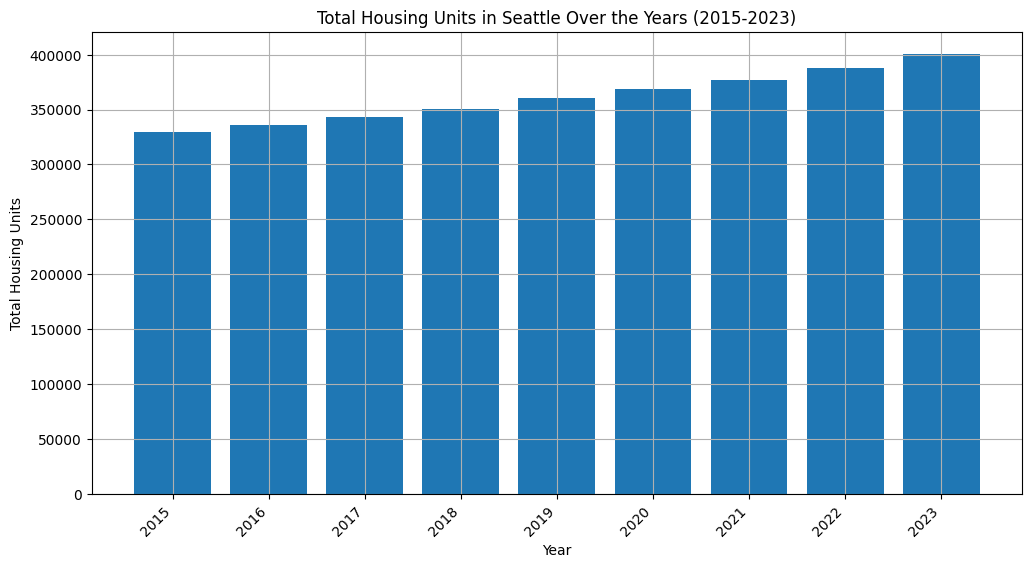

In [ ]:

#columns to plot
years = [
    '2015 Intercensal Total Housing Unit Estimate', '2016 Intercensal Total Housing Unit Estimate',
    '2017 Intercensal Total Housing Unit Estimate', '2018 Intercensal Total Housing Unit Estimate',
    '2019 Intercensal Total Housing Unit Estimate', '2020 Total Housing Unit Base',
    '2021 Postcensal Estimate of Total Housing Units¹', '2022 Postcensal Estimate of Total Housing Units',
    '2023 Postcensal Estimate of Total Housing Units'
]

# Extracting the data from the DataFrame
data_to_plot = combined_housing_data[years].iloc[0]

plt.figure(figsize=(12, 6))
plt.bar(years, data_to_plot)

plt.title('Total Housing Units in Seattle Over the Years (2015-2023)')
plt.xlabel('Year')
plt.ylabel('Total Housing Units')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.xticks(range(len(years)), [year.split()[0] for year in years], rotation=45, ha='right')
plt.show()


In [ ]:
#change in housing unit from 2015 to 2023
combined_housing_data['2023 Postcensal Estimate of Total Housing Units']-combined_housing_data['2015 Intercensal Total Housing Unit Estimate']

0   71,240.00
dtype: object

In [ ]:
df_seattle_rental.head()

,RegistrationNum,RegisteredTypeMapped,RegisteredTypeDesc,RentalHousingUnits,PropertyName,RegisteredDate,ExpiresDate,StatusCurrent,OriginalAddress1,OriginalCity,OriginalState,OriginalZip,PropertyContactName,Link,Latitude,Longitude,Location1
0,001-0100004,Rental Property,Registration,23,The Annapolis,2023-03-28,4/21/2025,Active Registration,1531 BELMONT AVE,SEATTLE,WA,"98,122.00",Tasha McQuay,https://cosaccela.seattle.gov/portal/customize...,47.62,-122.32,"(47.61506676, -122.32485293)"
1,001-0100005,Rental Property,Registration,12,TERRACE VIEW BLDG 7,2023-10-19,10/19/2025,Active Registration,3600 NE 73RD PL,SEATTLE,WA,"98,115.00",NaN,https://cosaccela.seattle.gov/portal/customize...,47.68,-122.29,"(47.68191074, -122.28921011)"
2,001-0100010,Rental Property,Registration,28,Terrace View,2022-03-02,3/2/2024,Active Registration,3705 CALIFORNIA AVE SW,SEATTLE,WA,"98,116.00","Associates West Real Estate Seattle LLC , Asso...",https://cosaccela.seattle.gov/portal/customize...,47.57,-122.39,"(47.57098331, -122.38726139)"
3,001-0100011,Rental Property,Registration,21,Manning Place Apts,2022-03-02,3/2/2024,Active Registration,3614 California AVE SW,Seattle,WA,"98,116.00","Associates West Real Estate Seattle LLC , Asso...",https://cosaccela.seattle.gov/portal/customize...,47.57,-122.39,"(47.57144209, -122.38641358)"
4,001-0100015,Rental Property,Registration,25,6040 Cali Apartments,2023-07-06,7/14/2025,Active Registration,6040 CALIFORNIA AVE SW,SEATTLE,WA,"98,136.00","Phillips Real Estate, LLC , Phillips Real Esta...",https://cosaccela.seattle.gov/portal/customize...,47.55,-122.39,"(47.54731204, -122.38657767)"


In [ ]:
df_seattle_rental['StatusCurrent'].unique()


array(['Active Registration'], dtype=object)

In [ ]:
df_seattle_rental['Location1'].count()

27107

In [ ]:

# Convert the 'RegisteredDate' column to datetime format
df_seattle_rental['RegisteredDate'] = pd.to_datetime(df_seattle_rental['RegisteredDate'])

# Filter rental units registered after 1/1/2022
filtered_rental_units = df_seattle_rental[df_seattle_rental['RegisteredDate'] < '2016-01-01']

# Count the number of rental units
count_of_rental_units = filtered_rental_units.shape[0]

# Print the filtered rental units and count
print("Rental Units Registered:")
print(filtered_rental_units)
print("\nNumber of Rental Units Registered After:", count_of_rental_units)


Rental Units Registered:
     RegistrationNum RegisteredTypeMapped RegisteredTypeDesc  \
1081     001-0101693      Rental Property       Registration   
1994     001-0103543      Rental Property       Registration   
2417     001-0104163      Rental Property       Registration   
2427     001-0104174      Rental Property       Registration   
2446     001-0104195      Rental Property       Registration   
2450     001-0104200      Rental Property       Registration   
2457     001-0104207      Rental Property       Registration   
2463     001-0104214      Rental Property       Registration   
2464     001-0104215      Rental Property       Registration   
2465     001-0104216      Rental Property       Registration   
2466     001-0104218      Rental Property       Registration   
2470     001-0104222      Rental Property       Registration   
2472     001-0104225      Rental Property       Registration   
2473     001-0104226      Rental Property       Registration   
2476     001-01

C:\Users\tgeod\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\contextily\tile.py:614: UserWarning: The inferred zoom level of 29 is not valid for the current tile provider (valid zooms: 0 - 19).
  warnings.warn(msg)


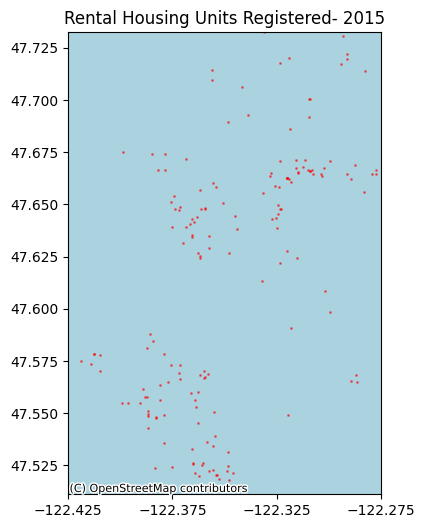

In [ ]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import contextily as ctx

# Filtering rental units to remove rows with missing locations
filtered_rental_units = df_seattle_rental[~(df_seattle_rental['Latitude'].isna() | df_seattle_rental['Longitude'].isna())]

# Filtering for the year 2015
rental_units_2015 = filtered_rental_units[
    (filtered_rental_units['RegisteredDate'] >= '2015-01-01') &
    (filtered_rental_units['RegisteredDate'] <= '2015-12-30') &
    (filtered_rental_units['ExpiresDate'] >= '2015-02-01')
]

geometry = [Point(xy) for xy in zip(rental_units_2015['Longitude'], rental_units_2015['Latitude'])]
gdf = gpd.GeoDataFrame(rental_units_2015, geometry=geometry)

# Getting bounding box of the GeoDataFrame
bbox = gdf.total_bounds

# Creating a base map using contextily
ax = gdf.plot(figsize=(10, 6), color='red', markersize=1, alpha=0.5)
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# Setting the x and y-axis limits based on the bounding box
ax.set_xlim([bbox[0], bbox[2]])
ax.set_ylim([bbox[1], bbox[3]])

# Customizing x-axis ticks
ax.set_xticks(ax.get_xticks()[::2])  # Adjusted the interval as needed

# Displaying map
plt.title('Rental Housing Units Registered- 2015')
plt.show()


In [ ]:
filtered_rental_units['Location1'].unique

<bound method Series.unique of 0        (47.61506676, -122.32485293)
1        (47.68191074, -122.28921011)
2        (47.57098331, -122.38726139)
3        (47.57144209, -122.38641358)
4        (47.54731204, -122.38657767)
                     ...             
27236     (47.6813232, -122.32321744)
27237    (47.61316626, -122.34264612)
27238    (47.50584641, -122.25536376)
27239     (47.5852519, -122.31295098)
27240     (47.72400731, -122.3549938)
Name: Location1, Length: 27107, dtype: object>

C:\Users\tgeod\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\contextily\tile.py:614: UserWarning: The inferred zoom level of 29 is not valid for the current tile provider (valid zooms: 0 - 19).
  warnings.warn(msg)


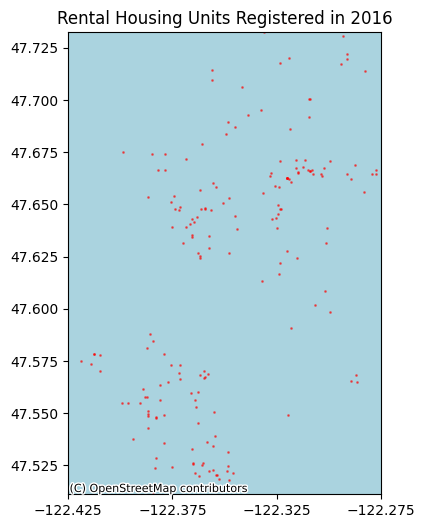

C:\Users\tgeod\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\contextily\tile.py:614: UserWarning: The inferred zoom level of 29 is not valid for the current tile provider (valid zooms: 0 - 19).
  warnings.warn(msg)


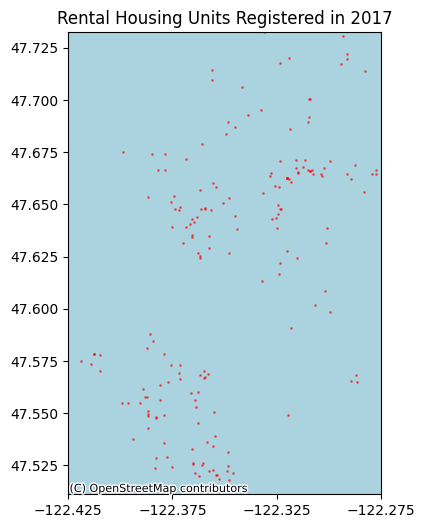

C:\Users\tgeod\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\contextily\tile.py:614: UserWarning: The inferred zoom level of 29 is not valid for the current tile provider (valid zooms: 0 - 19).
  warnings.warn(msg)


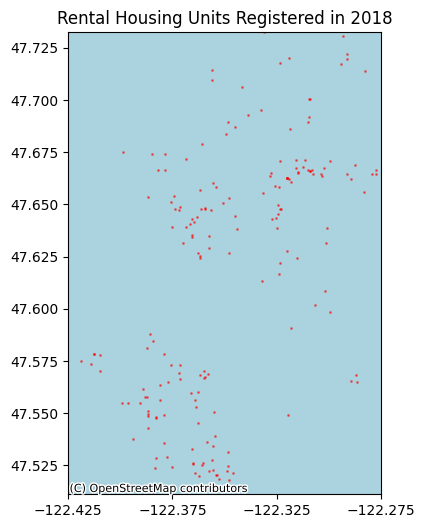

C:\Users\tgeod\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\contextily\tile.py:614: UserWarning: The inferred zoom level of 29 is not valid for the current tile provider (valid zooms: 0 - 19).
  warnings.warn(msg)


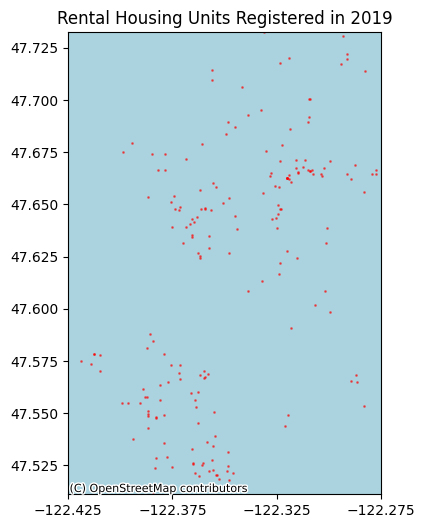

C:\Users\tgeod\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\contextily\tile.py:614: UserWarning: The inferred zoom level of 29 is not valid for the current tile provider (valid zooms: 0 - 19).
  warnings.warn(msg)


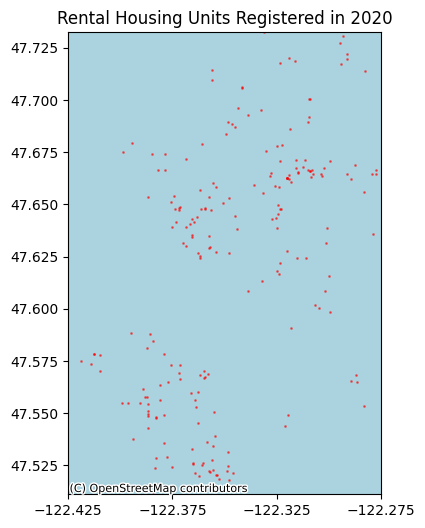

C:\Users\tgeod\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\contextily\tile.py:614: UserWarning: The inferred zoom level of 29 is not valid for the current tile provider (valid zooms: 0 - 19).
  warnings.warn(msg)


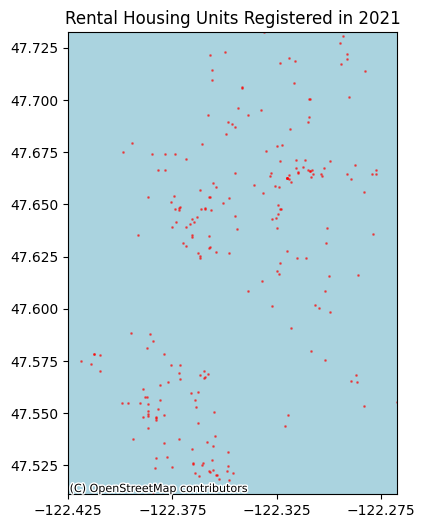

C:\Users\tgeod\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\contextily\tile.py:614: UserWarning: The inferred zoom level of 29 is not valid for the current tile provider (valid zooms: 0 - 19).
  warnings.warn(msg)


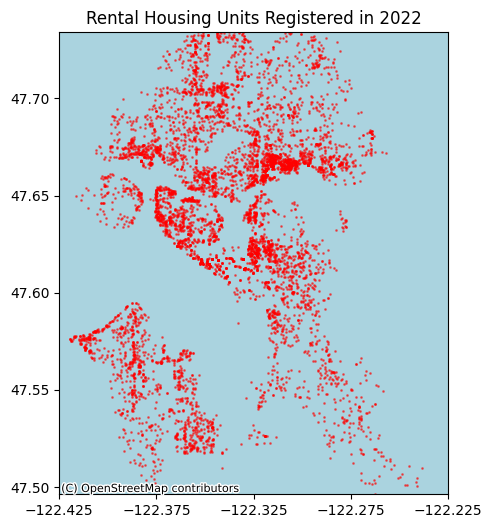

C:\Users\tgeod\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\contextily\tile.py:614: UserWarning: The inferred zoom level of 29 is not valid for the current tile provider (valid zooms: 0 - 19).
  warnings.warn(msg)


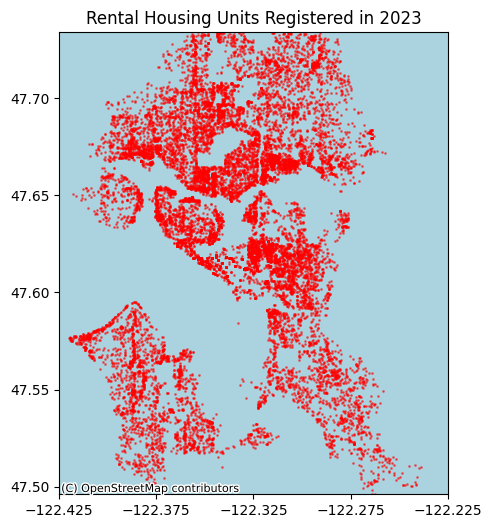

In [ ]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import contextily as ctx

# Filtering rental units to remove rows with missing locations
filtered_rental_units = df_seattle_rental[~(df_seattle_rental['Latitude'].isna() | df_seattle_rental['Longitude'].isna())]

# Defining the years to loop through
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

for year in years:
    # Filtering for the current year. Taking all rental unit registered from 2015 and until the year of interest 
    #And setting the rental unit registration expiration date to the 2nd month of the year of interest
    rental_units_year = filtered_rental_units[
        (filtered_rental_units['RegisteredDate'] >= '2015-01-01') &
        (filtered_rental_units['RegisteredDate'] <= f'{year}-12-30') &
        (filtered_rental_units['ExpiresDate'] >= f'{year}-02-01')
    ]

    
    geometry = [Point(xy) for xy in zip(rental_units_year['Longitude'], rental_units_year['Latitude'])]
    gdf = gpd.GeoDataFrame(rental_units_year, geometry=geometry)

    # Getting bounding box of the GeoDataFrame
    bbox = gdf.total_bounds

    # Creating a base map using contextily
    ax = gdf.plot(figsize=(10, 6), color='red', markersize=1, alpha=0.5)
    ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

    # Setting the x and y-axis limits based on the bounding box
    ax.set_xlim([bbox[0], bbox[2]])
    ax.set_ylim([bbox[1], bbox[3]])

    # Customizing x-axis ticks
    ax.set_xticks(ax.get_xticks()[::2])  # Adjusted the interval as needed

    # Displaying map with title for the current year
    plt.title(f'Rental Housing Units Registered in {year}')
    plt.show()


In [ ]:
# Filter rental units to remove rows with missing locations
filtered_rental_units = df_seattle_rental[~(df_seattle_rental['Latitude'].isna() | df_seattle_rental['Longitude'].isna())]

# Defining the years to loop through
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

for year in years:
    # Filtering for the current year
    rental_units_year = filtered_rental_units[
        (filtered_rental_units['RegisteredDate'] >= '2015-01-01') &
        (filtered_rental_units['RegisteredDate'] <= f'{year}-12-30') &
        (filtered_rental_units['ExpiresDate'] >= f'{year}-01-01')
    ]

    # Sum the RentalHousingUnits for the current year
    total_units = rental_units_year['RentalHousingUnits'].sum()

    # Print the sum for the current year
    print(f'Total Rental Housing Units - {year}: {total_units}')


Total Rental Housing Units - 2016: 933
Total Rental Housing Units - 2017: 935
Total Rental Housing Units - 2018: 936
Total Rental Housing Units - 2019: 950
Total Rental Housing Units - 2020: 1109
Total Rental Housing Units - 2021: 1142
Total Rental Housing Units - 2022: 34887
Total Rental Housing Units - 2023: 99375


In [ ]:
"""Previously rental property owners were required to register once every five years. 
This changed in 2019, increasing the frequency of registrations to once every two years."""

# Filter rental units to remove rows with missing locations
filtered_rental_units = df_seattle_rental[~(df_seattle_rental['Latitude'].isna() | df_seattle_rental['Longitude'].isna())]

# Define the years to loop through
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

for year in years:
    # Filter for the current year
    rental_units_year = filtered_rental_units[
        (filtered_rental_units['RegisteredDate'] >= f'{year}-1-1') &
        (filtered_rental_units['RegisteredDate'] <= f'{year}-12-30')
    ]

    # Sum the RentalHousingUnits for the current year
    total_units = rental_units_year['RentalHousingUnits'].sum()

    # Print the sum for the current year
    print(f'Total Rental Housing Units Registered in {year}: {total_units}')

Total Rental Housing Units Registered in 2016: 243
Total Rental Housing Units Registered in 2017: 8
Total Rental Housing Units Registered in 2018: 37
Total Rental Housing Units Registered in 2019: 630
Total Rental Housing Units Registered in 2020: 170
Total Rental Housing Units Registered in 2021: 4234
Total Rental Housing Units Registered in 2022: 55453
Total Rental Housing Units Registered in 2023: 111254


In [ ]:
unique_rental_units = df_seattle_rental.drop_duplicates(subset=['Location1'])

# Number of unique rental units
num_unique_rental_units = len(unique_rental_units)

# Number of duplicates
num_duplicates = len(df_seattle_rental) - num_unique_rental_units

print(f"Number of unique rental units: {num_unique_rental_units}")
print(f"Number of duplicates: {num_duplicates}")

print(f'Total Rental Housing Units Registered in {year}: {total_units}')
    


Number of unique rental units: 23670
Number of duplicates: 3571
Total Rental Housing Units Registered in 2023: 111254


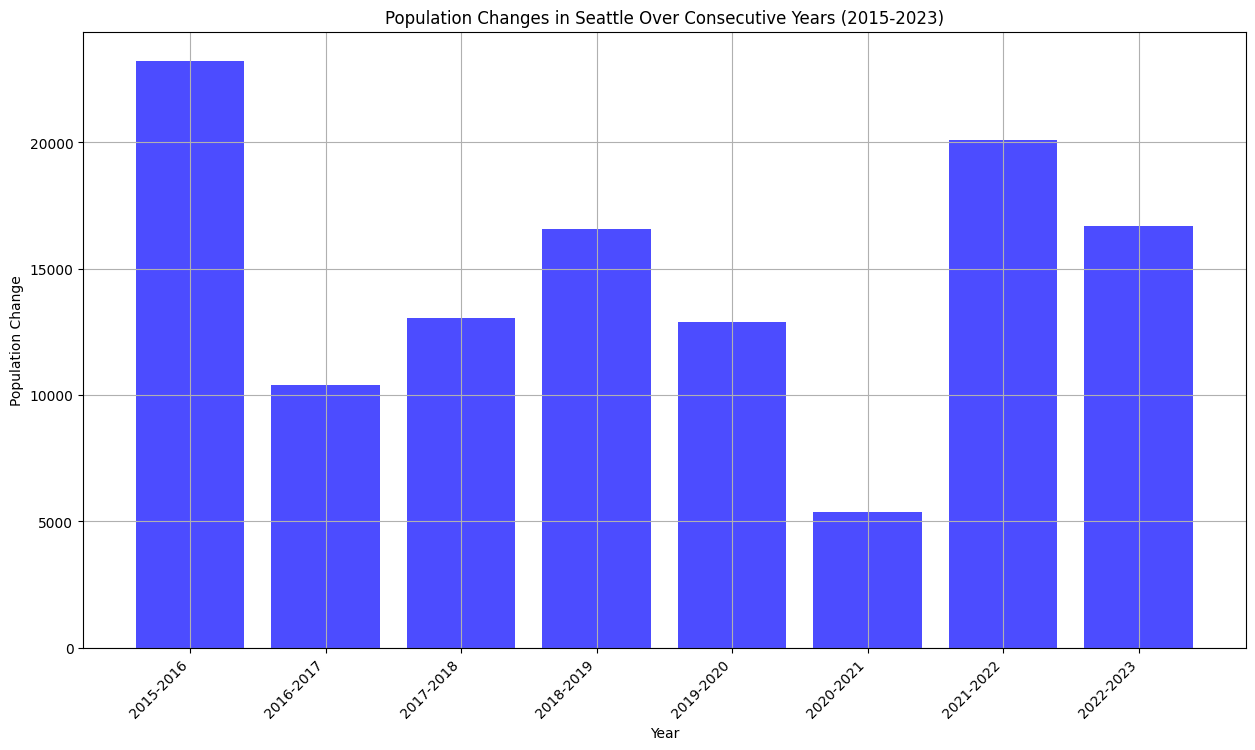

In [ ]:
# Extracting the columns for plotting. Plotting from 2015 to 2023.
years_columns = ['2015 Intercensal Total Population Estimate',
                 '2016 Intercensal Total Population Estimate', '2017 Intercensal Total Population Estimate',
                 '2018 Intercensal Total Population Estimate', '2019 Intercensal Total Population Estimate',
                 '2020 Population Census', '2021 Population Estimate¹',
                 '2022 Population Estimate', '2023 Population Estimate']

# Calculating the differences between consecutive years
population_changes = np.diff(combined_population_data[years_columns].iloc[0])

# Plotting a bar chart for population changes
plt.figure(figsize=(15, 8))
plt.bar(range(len(years_columns) - 1), population_changes, color='blue', alpha=0.7)

plt.title('Population Changes in Seattle Over Consecutive Years (2015-2023)')
plt.xlabel('Year')
plt.ylabel('Population Change')
plt.xticks(range(len(years_columns) - 1), [f'{year.split()[0]}-{int(year.split()[0])+1}' for year in years_columns[:-1]], rotation=45, ha='right')

plt.grid(True)

plt.show()


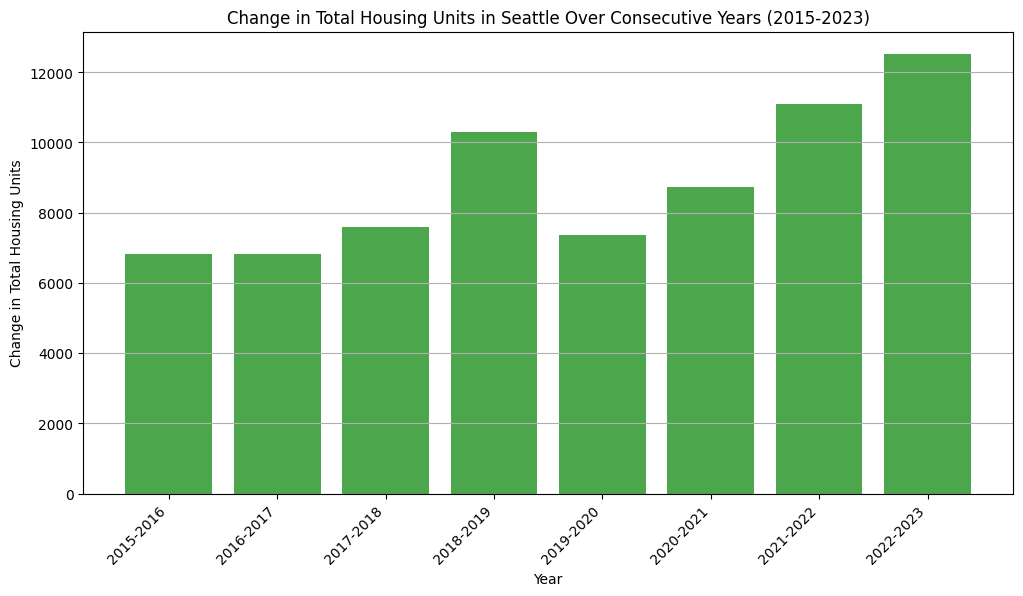

In [ ]:
#columns to plot
years = [
    '2015 Intercensal Total Housing Unit Estimate', '2016 Intercensal Total Housing Unit Estimate',
    '2017 Intercensal Total Housing Unit Estimate', '2018 Intercensal Total Housing Unit Estimate',
    '2019 Intercensal Total Housing Unit Estimate', '2020 Total Housing Unit Base',
    '2021 Postcensal Estimate of Total Housing Units¹', '2022 Postcensal Estimate of Total Housing Units',
    '2023 Postcensal Estimate of Total Housing Units'
]

# Extracting the data from the DataFrame
data_to_plot = combined_housing_data[years].iloc[0]

# Calculating the differences between consecutive years
housing_units_changes = np.diff(data_to_plot)

plt.figure(figsize=(12, 6))
plt.bar(years[:-1], housing_units_changes, color='green', alpha=0.7)

plt.title('Change in Total Housing Units in Seattle Over Consecutive Years (2015-2023)')
plt.xlabel('Year')
plt.ylabel('Change in Total Housing Units')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.xticks(range(len(years) - 1), [f'{year.split()[0]}-{int(year.split()[0])+1}' for year in years[:-1]], rotation=45, ha='right')

plt.show()



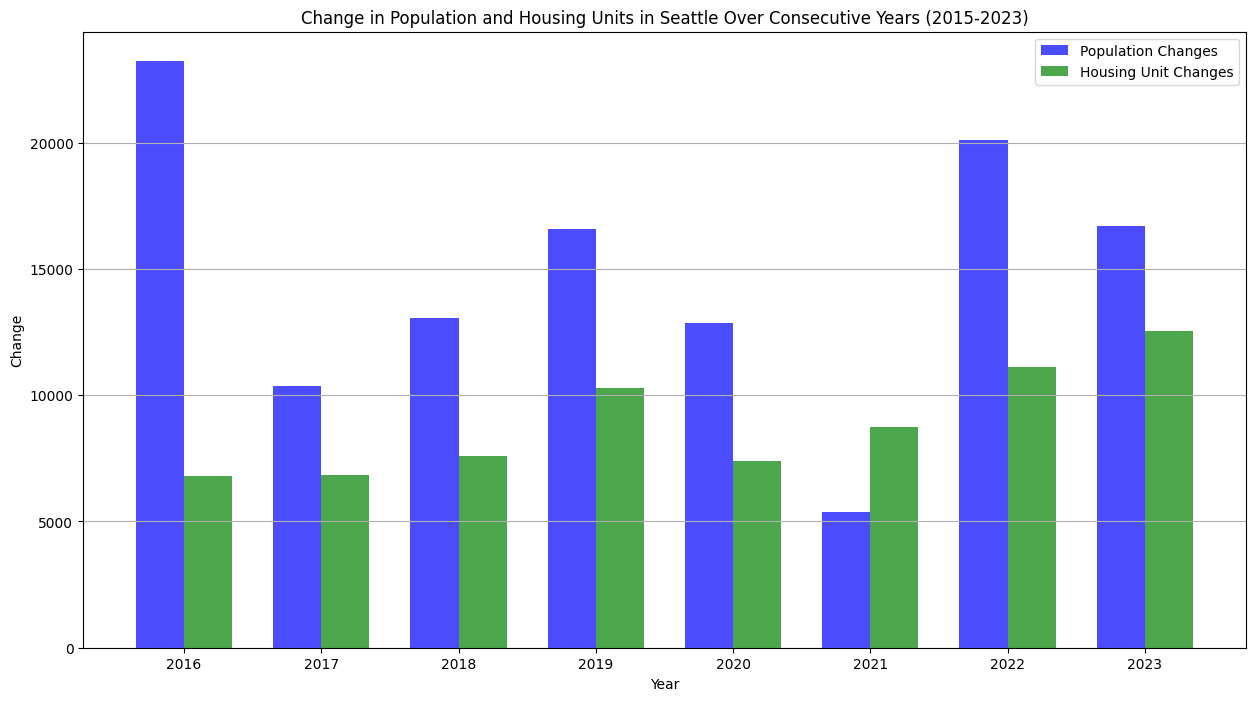

In [ ]:
# Extracting the columns for plotting. Plotting from 2015 to 2023.
population_years = [
    '2015 Intercensal Total Population Estimate',
    '2016 Intercensal Total Population Estimate', '2017 Intercensal Total Population Estimate',
    '2018 Intercensal Total Population Estimate', '2019 Intercensal Total Population Estimate',
    '2020 Population Census', '2021 Population Estimate¹',
    '2022 Population Estimate', '2023 Population Estimate'
]

housing_units_years = [
    '2015 Intercensal Total Housing Unit Estimate', '2016 Intercensal Total Housing Unit Estimate',
    '2017 Intercensal Total Housing Unit Estimate', '2018 Intercensal Total Housing Unit Estimate',
    '2019 Intercensal Total Housing Unit Estimate', '2020 Total Housing Unit Base',
    '2021 Postcensal Estimate of Total Housing Units¹', '2022 Postcensal Estimate of Total Housing Units',
    '2023 Postcensal Estimate of Total Housing Units'
]

# Extracting the data from the DataFrames
population_data_to_plot = combined_population_data[population_years].iloc[0]
housing_units_data_to_plot = combined_housing_data[housing_units_years].iloc[0]

# Calculating the differences between consecutive years
population_changes = np.diff(population_data_to_plot)
housing_units_changes = np.diff(housing_units_data_to_plot)

# Bar width for better visualization
bar_width = 0.35

# Plotting both changes on the same bar chart
fig, ax = plt.subplots(figsize=(15, 8))
bar1 = ax.bar(np.arange(len(population_changes)), population_changes, width=bar_width, label='Population Changes', color='blue', alpha=0.7)
bar2 = ax.bar(np.arange(len(housing_units_changes)) + bar_width, housing_units_changes, width=bar_width, label='Housing Unit Changes', color='green', alpha=0.7)

ax.set_title('Change in Population and Housing Units in Seattle Over Consecutive Years (2015-2023)')
ax.set_xlabel('Year')
ax.set_ylabel('Change')
ax.set_xticks(np.arange(len(population_changes)) + bar_width / 2)
ax.set_xticklabels([year.split()[0] for year in population_years[1:]])

ax.legend()
plt.grid(axis='y')
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the Excel file
sales_data = pd.read_excel(r'C:\Users\tgeod\Downloads\UC Berkeley\200- Python for Data Science\Complete Data-Seattle\Data to use\sales1.xlsx')
sales_data.head()

,Region,2014-12-01 00:00:00,2015-01-01 00:00:00,2015-02-01 00:00:00,2015-03-01 00:00:00,2015-04-01 00:00:00,2015-05-01 00:00:00,2015-06-01 00:00:00,2015-07-01 00:00:00,2015-08-01 00:00:00,...,2023-01-01 00:00:00,2023-02-01 00:00:00,2023-03-01 00:00:00,2023-04-01 00:00:00,2023-05-01 00:00:00,2023-06-01 00:00:00,2023-07-01 00:00:00,2023-08-01 00:00:00,2023-09-01 00:00:00,2023-10-01 00:00:00
0,"Chicago, IL metro area",7028,4928,5036,7200,8027,9206,11267,10697,9483,...,3863,4302,6816,6655,7834,8685,7177,7747,6538,6126
1,"Los Angeles, CA metro area",6010,4432,4304,6117,6688,6717,7543,7599,6877,...,2854,3077,4490,3932,4680,4861,4117,4658,3905,3936
2,"Seattle, WA metro area",3456,2309,2635,3884,4432,4653,5249,5259,4744,...,1541,2194,2866,2706,3197,3370,2978,3147,2726,2579
3,"Boston, MA metro area",3992,2513,2025,2604,3005,4044,6229,6408,5808,...,2164,1828,2670,2580,3438,4483,3701,3780,3055,2981
4,"Philadelphia, PA metro area",1734,1242,1240,1553,1783,1978,2502,2295,1982,...,1257,1285,1776,1727,2123,2147,1761,1862,1629,1572


In [ ]:

# Filter rows where 'Region' is 'Seattle, WA'
seattle_sales_data = sales_data[sales_data['Region'].str.contains('Seattle, WA metro area')]

seattle_sales_data.head()

,Region,2014-12-01 00:00:00,2015-01-01 00:00:00,2015-02-01 00:00:00,2015-03-01 00:00:00,2015-04-01 00:00:00,2015-05-01 00:00:00,2015-06-01 00:00:00,2015-07-01 00:00:00,2015-08-01 00:00:00,...,2023-01-01 00:00:00,2023-02-01 00:00:00,2023-03-01 00:00:00,2023-04-01 00:00:00,2023-05-01 00:00:00,2023-06-01 00:00:00,2023-07-01 00:00:00,2023-08-01 00:00:00,2023-09-01 00:00:00,2023-10-01 00:00:00
2,"Seattle, WA metro area",3456,2309,2635,3884,4432,4653,5249,5259,4744,...,1541,2194,2866,2706,3197,3370,2978,3147,2726,2579


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the Excel file
sales_data = pd.read_excel(r'C:\Users\tgeod\Downloads\UC Berkeley\200- Python for Data Science\Complete Data-Seattle\Data to use\sales1.xlsx')

# Filter rows where 'Region' is 'Seattle, WA'
seattle_sales_data = sales_data[sales_data['Region'].str.contains('Seattle, WA metro area')]

# Extract only the date columns
date_columns = seattle_sales_data.columns[1:]
date_columns


Index([2014-12-01 00:00:00, 2015-01-01 00:00:00, 2015-02-01 00:00:00,
       2015-03-01 00:00:00, 2015-04-01 00:00:00, 2015-05-01 00:00:00,
       2015-06-01 00:00:00, 2015-07-01 00:00:00, 2015-08-01 00:00:00,
       2015-09-01 00:00:00,
       ...
       2023-01-01 00:00:00, 2023-02-01 00:00:00, 2023-03-01 00:00:00,
       2023-04-01 00:00:00, 2023-05-01 00:00:00, 2023-06-01 00:00:00,
       2023-07-01 00:00:00, 2023-08-01 00:00:00, 2023-09-01 00:00:00,
       2023-10-01 00:00:00],
      dtype='object', length=107)

In [ ]:

# Convert the date columns to datetime format
seattle_sales_data[date_columns] = seattle_sales_data[date_columns].apply(pd.to_datetime, errors='coerce')
seattle_sales_data[date_columns]


C:\Users\tgeod\AppData\Local\Temp\ipykernel_20604\4103240463.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seattle_sales_data[date_columns] = seattle_sales_data[date_columns].apply(pd.to_datetime, errors='coerce')


,2014-12-01,2015-01-01,2015-02-01,2015-03-01,2015-04-01,2015-05-01,2015-06-01,2015-07-01,2015-08-01,2015-09-01,...,2023-01-01,2023-02-01,2023-03-01,2023-04-01,2023-05-01,2023-06-01,2023-07-01,2023-08-01,2023-09-01,2023-10-01
2,1970-01-01 00:00:00.000003456,1970-01-01 00:00:00.000002309,1970-01-01 00:00:00.000002635,1970-01-01 00:00:00.000003884,1970-01-01 00:00:00.000004432,1970-01-01 00:00:00.000004653,1970-01-01 00:00:00.000005249,1970-01-01 00:00:00.000005259,1970-01-01 00:00:00.000004744,1970-01-01 00:00:00.000004429,...,1970-01-01 00:00:00.000001541,1970-01-01 00:00:00.000002194,1970-01-01 00:00:00.000002866,1970-01-01 00:00:00.000002706,1970-01-01 00:00:00.000003197,1970-01-01 00:00:00.000003370,1970-01-01 00:00:00.000002978,1970-01-01 00:00:00.000003147,1970-01-01 00:00:00.000002726,1970-01-01 00:00:00.000002579


In [7]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

# These commands below set some options for pandas and to have matplotlib show the charts in the notebook
pd.set_option('display.max_rows', 1000)
pd.options.display.float_format = '{:,.2f}'.format
%matplotlib inline

# Load the data
# We have this defaulted to the folder OUTSIDE of your repo - please change it as needed
#contrib = pd.read_csv(r"C:\Users\Robeen\Downloads\UC Berkeley\200- Python for Data Science\Complete Data-Seattle\Data to use", index_col=False)

file_path_WA_median_home_prices = r'C:\Users\tgeod\Downloads\UC Berkeley\200- Python for Data Science\Complete Data-Seattle\Data to use\HMR-4Q2022-annual-medians.xlsx'
df_median_prices = pd.read_excel(file_path_WA_median_home_prices)

file_path_US_mortgage_rates = r'C:\Users\tgeod\Downloads\UC Berkeley\200- Python for Data Science\Complete Data-Seattle\Data to use\MORTGAGE30US.xls'
df_mortgage_rates = pd.read_excel(file_path_US_mortgage_rates)


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\tgeod\\Downloads\\UC Berkeley\\200- Python for Data Science\\Complete Data-Seattle\\Data to use\\HMR-4Q2022-annual-medians.xlsx'

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Converting the "County" column to categorical for proper ordering
df_median_prices["County"] = pd.Categorical(df_median_prices["County"], categories=["Adams", "Asotin", "Benton", "Chelan", "Clallam", "Clark", "Columbia", "Cowlitz", "Douglas", "Ferry",
                                                          "Franklin", "Garfield", "Grant", "GraysHarbor", "Island", "Jefferson", "King", "Kitsap", "Kittitas",
                                                          "Klickitat", "Lewis", "Lincoln", "Mason", "Okanogan", "Pacific", "Pend", "Pierce", "SanJuan", "Skagit",
                                                          "Skamania", "Snohomish", "Spokane", "Stevens", "Thurston", "Wahkiakum", "WallaWalla", "Whatcom", "Whitman",
                                                          "Yakima", "Statewide"],
                                                        ordered=True)

# Sort the DataFrame by the "County" column
df_median_prices = df_median_prices.sort_values(by="County")

# Reshape the DataFrame for seaborn
df_median_prices_melted = pd.melt(df_median_prices, id_vars=["County"], var_name="Year", value_name="Median Price")

# Convert the "Year" column to string type
df_median_prices_melted["Year"] = df_median_prices_melted["Year"].astype(str)

# Create faceted subplots using seaborn
g = sns.FacetGrid(df_median_prices_melted, col="County", col_wrap=5, height=3, sharey=False)
g.map(plt.plot, "Year", "Median Price", marker="o")

# Set titles and labels
g.set_titles(col_template="{col_name}")
g.set_axis_labels("Year", "Median Home Price ($)")

# Add a title to the entire graph
g.fig.suptitle("Median Washington State Home Prices 2015-2022 by County", y=1.02)

# Adjust layout
plt.tight_layout()
plt.show()



NameError: name 'df_median_prices' is not defined

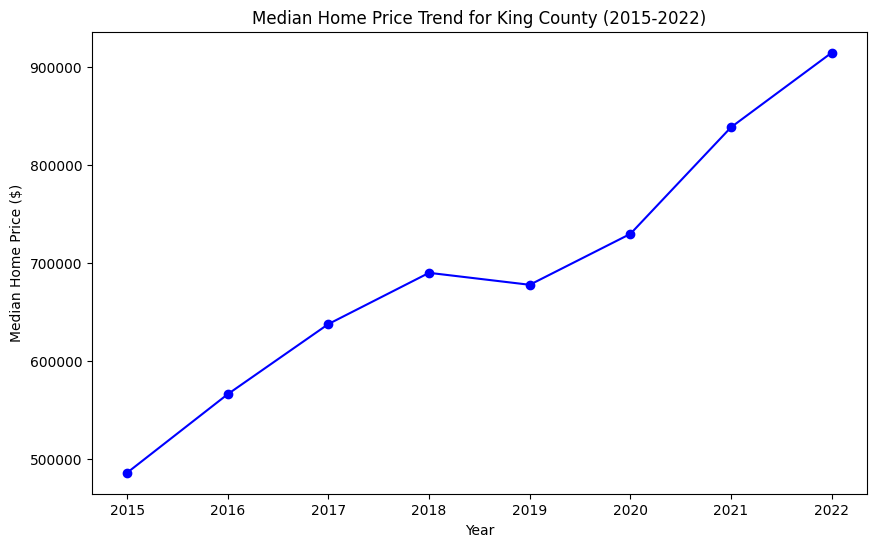

In [ ]:
# Filter data for 'King' county
king_county_data = df_median_prices[df_median_prices['County'] == 'King']

# Extract years and clean median prices
years = df_median_prices.columns[1:].astype(int)
median_prices_king = king_county_data.iloc[:, 1:].replace('[\$,]', '', regex=True).astype(float).values.flatten()

# Create a line plot for 'King' county
plt.figure(figsize=(10, 6))
plt.plot(years, median_prices_king, marker='o', linestyle='-', color='b')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Median Home Price ($)')
plt.title('Median Home Price Trend for King County (2015-2022)')

# Display the plot
plt.show()

In [ ]:
# Calculate yearly mortgage rate increases
mortgage_df['Year'] = mortgage_df['DATE'].dt.year
mortgage_df['Mortgage Rate Increase'] = mortgage_df['MORTGAGE30US'].diff()

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(mortgage_df['Year'], mortgage_df['Mortgage Rate Increase'], color='skyblue')
plt.xlabel('Year')
plt.ylabel('Mortgage Rate Increase (%)')
plt.title('Yearly Mortgage Rate Increases (2015 to Present)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

NameError: name 'mortgage_df' is not defined